# Step 1. Getting the SEED dataset

## 1.1 load the matlab format files and take a look

In [1]:
import mne
from scipy import io
import os
import numpy as np

In [2]:
folderpath = "./Preprocessed_EEG"

In [3]:
raw_1_1 = io.loadmat('./Preprocessed_EEG/1_20131027.mat')
raw_1_2 = io.loadmat('./Preprocessed_EEG/1_20131030.mat')
raw_1_3 = io.loadmat('./Preprocessed_EEG/1_20131107.mat')
# raw_2_1 = scipy.io.loadmat('./Preprocessed_EEG/2_20140404.mat')
label = io.loadmat('./Preprocessed_EEG/label.mat')

In [4]:
raw_1_1.keys(), raw_1_2.keys(), raw_1_3.keys(), label.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15']),
 dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15']),
 dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15']),
 dict_keys(['__header__', '__version__', '__globals__', 'label']))

In [5]:
raw_1_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15'])

In [6]:
raw_1_1['djc_eeg2'].shape, raw_1_2['djc_eeg2'].shape, raw_1_1['djc_eeg10'].shape, raw_1_3['djc_eeg10'].shape

((62, 46601), (62, 46601), (62, 47401), (62, 47401))

raw_1_1['djc_eeg1']:
- raw_1_1: the raw eeg data, the 1st subject(out of 15 subjects), the 1st experiments(out of 3 experiments)
- 'djc_eeg1': djc could possibly mean the name of the subject(which leaks the privacy XD), and 'eeg1' represents it is the 1st trial(out of 15 trials)
- 62: n_channels
- 47001: roughly 4 mins(240sec * 200 Hz sampling rate) the eeg signal during watching the movies

In [7]:
label['label'][0]

array([ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1],
      dtype=int16)

## 1.2 Create the torch dataset

### 1.2.1 cut compute windows

since a movie clip contains eeg signals of ~240 seconds with sf=200Hz, I decide to cut them into 4 sec windows

In [8]:
len_window = 200 * 4

raw_X = []
raw_y = []

prefix = 'djc_eeg'

# raw_1_1
for i in range(1, 16):
    data = raw_1_1[prefix + str(i)]
    # print(data.shape)
    n_windows = data.shape[1] // len_window
    # print(n_windows)
    data_list = []
    for idx in range(n_windows):
        cur_window = data[:, idx*len_window:(idx+1)*len_window]
        data_list.append(cur_window)
    reshaped_X = np.stack(data_list).transpose((1, 2, 0))
    # print(reshaped_X.shape)
    # reshaped_X = np.reshape(data[:, :n_windows * len_window], (62, len_window, n_windows))
    raw_X.append(reshaped_X)
    raw_y.append(np.array([label['label'][0][i-1] for j in range(n_windows)]))

# raw_1_2
for i in range(1, 16):
    data = raw_1_2[prefix + str(i)]
    # print(data.shape)
    n_windows = data.shape[1] // len_window
    # print(n_windows)
    data_list = []
    for idx in range(n_windows):
        cur_window = data[:, idx*len_window:(idx+1)*len_window]
        data_list.append(cur_window)
    reshaped_X = np.stack(data_list).transpose((1, 2, 0))
    # print(reshaped_X.shape)
    # reshaped_X = np.reshape(data[:, :n_windows * len_window], (62, len_window, n_windows))
    raw_X.append(reshaped_X)
    raw_y.append(np.array([label['label'][0][i-1] for j in range(n_windows)]))
    # print(reshaped_X.shape)   # print(reshaped_X.shape)

# raw_1_3
for i in range(1, 16):
    data = raw_1_3[prefix + str(i)]
    # print(data.shape)
    n_windows = data.shape[1] // len_window
    # print(n_windows)
    data_list = []
    for idx in range(n_windows):
        cur_window = data[:, idx*len_window:(idx+1)*len_window]
        data_list.append(cur_window)
    reshaped_X = np.stack(data_list).transpose((1, 2, 0))
    # print(reshaped_X.shape)
    # reshaped_X = np.reshape(data[:, :n_windows * len_window], (62, len_window, n_windows))
    raw_X.append(reshaped_X)
    raw_y.append(np.array([label['label'][0][i-1] for j in range(n_windows)]))
    # print(reshaped_X.shape)   # print(reshaped_X.shape)

In [9]:
concat_X = np.concatenate(raw_X, axis=2)
print(concat_X.shape)
concat_y = np.concatenate(raw_y)
print(concat_y.shape)

(62, 800, 2526)
(2526,)


### 1.2.2 Encode the labels

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [11]:
concat_y

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int16)

In [12]:
le = LabelEncoder()
y = le.fit_transform(concat_y)
y = pd.get_dummies(y)
y

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2521,1,0,0
2522,1,0,0
2523,1,0,0
2524,1,0,0


one-hot encoding
- positive:  1 => [0, 0 ,1]
- neutral:   0 => [0, 1, 0]
- negative: -1 => [1, 0, 0]

In [13]:
y.shape, concat_X.shape

((2526, 3), (62, 800, 2526))

# Step 2. Create EEG-conformer model

In [14]:
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable 
from tqdm import tqdm
import matplotlib_inline

/home/pai/envs/fbc/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
cuda_version = torch.version.cuda
cuda_version

'11.7'

In [16]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length
        self.device = torch.device("cuda")

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(self.device) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(self.device) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out
 
model=LSTM(
    num_classes=3,
    input_size=62,
    hidden_size=50,
    num_layers=1,
    seq_length=800,
)

# 打印模型结构
print(model)

LSTM(
  (lstm): LSTM(62, 50, batch_first=True)
  (fc_1): Linear(in_features=50, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)


In [20]:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('the model will be trained on: ', device)
    model.to(device)

the model will be trained on:  cuda


LSTM(
  (lstm): LSTM(62, 50, batch_first=True)
  (fc_1): Linear(in_features=50, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)

In [22]:
from torchsummaryX import summary
summary(model, torch.zeros(32, 800, 62).to(device))

       Kernel Shape   Output Shape  Params Mult-Adds
Layer                                               
0_lstm            -  [32, 800, 50]   22.8k     22.4k
1_relu            -       [32, 50]       -         -
2_fc_1    [50, 128]      [32, 128]  6.528k      6.4k
3_relu            -      [32, 128]       -         -
4_fc       [128, 3]        [32, 3]   387.0     384.0
------------------------------------------------------
                       Totals
Total params          29.715k
Trainable params      29.715k
Non-trainable params      0.0
Mult-Adds             29.184k


/home/pai/envs/fbc/lib/python3.7/site-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_lstm,-,"[32, 800, 50]",22800.0,22400.0
1_relu,-,"[32, 50]",NaN,NaN
2_fc_1,"[50, 128]","[32, 128]",6528.0,6400.0
3_relu,-,"[32, 128]",NaN,NaN
4_fc,"[128, 3]","[32, 3]",387.0,384.0


# Step 3. Training the model

## 3.1 prepare the train set / test set

In [23]:
concat_X.shape, y.shape

((62, 800, 2526), (2526, 3))

In [24]:
X = concat_X.transpose((2, 1, 0))
X.shape

(2526, 800, 62)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=777)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1768, 800, 62), (758, 800, 62), (1768, 3), (758, 3))

## 3.2 Training

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train_tensor = torch.from_numpy(X_train).to(torch.float32).to(device)
y_train_tensor = torch.from_numpy(y_train.values).to(torch.float32).to(device)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

x_test_tensor = torch.from_numpy(X_test).to(torch.float32).to(device)
y_test_tensor = torch.from_numpy(y_test.values).to(torch.float32).to(device)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [28]:
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

In [29]:
def train(model, x_train, y_train, x_test, y_test, save_path='./model_LSTM/', n_epochs=100):
    """
    the training function.
    Attributes:
    - model: the instance of the network
    - save_path: the path to which the model state will be saved. None means w/o saving.

    Return: 
    the best model if save_path is not None, the last model otherwise
    """
    train_acc_list.clear()
    train_loss_list.clear()
    test_acc_list.clear()
    test_loss_list.clear()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('the model will be trained on: ', device)

    best_accuracy = 0.0
    
    for epoch in range(n_epochs):
        training_loss = 0.0
        testing_loss = 0.0
        correct = 0
        total = 0
        
        model.train()
        for inputs, labels in tqdm(train_loader):
            # print(inputs.shape, labels.shape)
            inputs = inputs.to(device)
            labels = labels.to(device)
            # print("lables.size", labels.shape)
            optimizer.zero_grad()
            
            outputs = model(inputs)
            # print(outputs.shape)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, label = torch.max(labels, 1)
            # print(predicted.shape)
            total += labels.size(0)
            correct += (predicted == label).sum().item()
        
        train_loss = training_loss / len(train_loader)
        train_loss_list.append(train_loss)
        train_accuracy = correct / total
        train_acc_list.append(train_accuracy)

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            
            for inputs, labels in test_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                testing_loss += loss.item()


                _, predicted = torch.max(outputs.data, 1)
                _, label = torch.max(labels, 1)
                total += labels.size(0)
                correct += (predicted == label).sum().item()
            
            test_loss = testing_loss / len(test_loader)
            test_loss_list.append(test_loss)
            test_accuracy = correct / total
            test_acc_list.append(test_accuracy)

            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                if save_path is not None:
                    torch.save(model.state_dict(), save_path + 'best_model.pth')
                    print("best_model found, best acc: ", best_accuracy)
        
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")
    
    if save_path is not None: 
        model.load_state_dict(torch.load(save_path + 'best_model.pth'))
    
    return model

In [31]:
best_model = train(model, X_train, X_test, y_train, y_test, n_epochs=100)

the model will be trained on:  cuda


100%|██████████| 56/56 [00:00<00:00, 193.66it/s]


best_model found, best acc:  0.3311345646437995
Epoch 1/100 - Train Loss: 1.0771 - Train Accuracy: 0.4186 - Test Loss: 1.0993 - Test Accuracy: 0.3311


100%|██████████| 56/56 [00:00<00:00, 194.96it/s]


best_model found, best acc:  0.3482849604221636
Epoch 2/100 - Train Loss: 1.0577 - Train Accuracy: 0.4434 - Test Loss: 1.0936 - Test Accuracy: 0.3483


100%|██████████| 56/56 [00:00<00:00, 194.99it/s]


best_model found, best acc:  0.36675461741424803
Epoch 3/100 - Train Loss: 1.0323 - Train Accuracy: 0.4853 - Test Loss: 1.1097 - Test Accuracy: 0.3668


100%|██████████| 56/56 [00:00<00:00, 196.32it/s]


best_model found, best acc:  0.36807387862796836
Epoch 4/100 - Train Loss: 0.9935 - Train Accuracy: 0.5096 - Test Loss: 1.1400 - Test Accuracy: 0.3681


100%|██████████| 56/56 [00:00<00:00, 202.21it/s]


best_model found, best acc:  0.37467018469656993
Epoch 5/100 - Train Loss: 0.9457 - Train Accuracy: 0.5475 - Test Loss: 1.1572 - Test Accuracy: 0.3747


100%|██████████| 56/56 [00:00<00:00, 202.95it/s]


Epoch 6/100 - Train Loss: 0.9143 - Train Accuracy: 0.5735 - Test Loss: 1.2072 - Test Accuracy: 0.3734


100%|██████████| 56/56 [00:00<00:00, 200.05it/s]


best_model found, best acc:  0.37994722955145116
Epoch 7/100 - Train Loss: 0.9007 - Train Accuracy: 0.5747 - Test Loss: 1.2185 - Test Accuracy: 0.3799


100%|██████████| 56/56 [00:00<00:00, 190.85it/s]


Epoch 8/100 - Train Loss: 0.8560 - Train Accuracy: 0.6012 - Test Loss: 1.2403 - Test Accuracy: 0.3470


100%|██████████| 56/56 [00:00<00:00, 194.30it/s]


Epoch 9/100 - Train Loss: 0.8008 - Train Accuracy: 0.6340 - Test Loss: 1.2729 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 194.23it/s]


best_model found, best acc:  0.3812664907651715
Epoch 10/100 - Train Loss: 0.8205 - Train Accuracy: 0.6069 - Test Loss: 1.3085 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:00<00:00, 188.99it/s]


Epoch 11/100 - Train Loss: 0.7799 - Train Accuracy: 0.6391 - Test Loss: 1.3198 - Test Accuracy: 0.3707


100%|██████████| 56/56 [00:00<00:00, 199.74it/s]


Epoch 12/100 - Train Loss: 0.7510 - Train Accuracy: 0.6493 - Test Loss: 1.3263 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 190.36it/s]


Epoch 13/100 - Train Loss: 0.7303 - Train Accuracy: 0.6459 - Test Loss: 1.3807 - Test Accuracy: 0.3681


100%|██████████| 56/56 [00:00<00:00, 198.87it/s]


best_model found, best acc:  0.38258575197889183
Epoch 14/100 - Train Loss: 0.7240 - Train Accuracy: 0.6663 - Test Loss: 1.3728 - Test Accuracy: 0.3826


100%|██████████| 56/56 [00:00<00:00, 196.10it/s]


Epoch 15/100 - Train Loss: 0.7031 - Train Accuracy: 0.6618 - Test Loss: 1.4408 - Test Accuracy: 0.3681


100%|██████████| 56/56 [00:00<00:00, 198.34it/s]


Epoch 16/100 - Train Loss: 0.6832 - Train Accuracy: 0.6855 - Test Loss: 1.4475 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 199.74it/s]


best_model found, best acc:  0.38522427440633245
Epoch 17/100 - Train Loss: 0.6625 - Train Accuracy: 0.7053 - Test Loss: 1.4638 - Test Accuracy: 0.3852


100%|██████████| 56/56 [00:00<00:00, 200.19it/s]


Epoch 18/100 - Train Loss: 0.6486 - Train Accuracy: 0.6855 - Test Loss: 1.4676 - Test Accuracy: 0.3839


100%|██████████| 56/56 [00:00<00:00, 194.40it/s]


Epoch 19/100 - Train Loss: 0.6322 - Train Accuracy: 0.7098 - Test Loss: 1.5480 - Test Accuracy: 0.3852


100%|██████████| 56/56 [00:00<00:00, 197.90it/s]


Epoch 20/100 - Train Loss: 0.6138 - Train Accuracy: 0.7104 - Test Loss: 1.5619 - Test Accuracy: 0.3734


100%|██████████| 56/56 [00:00<00:00, 202.53it/s]


Epoch 21/100 - Train Loss: 0.6158 - Train Accuracy: 0.6957 - Test Loss: 1.5983 - Test Accuracy: 0.3760


100%|██████████| 56/56 [00:00<00:00, 199.63it/s]


best_model found, best acc:  0.4050131926121372
Epoch 22/100 - Train Loss: 0.5934 - Train Accuracy: 0.7172 - Test Loss: 1.5958 - Test Accuracy: 0.4050


100%|██████████| 56/56 [00:00<00:00, 201.62it/s]


Epoch 23/100 - Train Loss: 0.6314 - Train Accuracy: 0.7064 - Test Loss: 1.6292 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:00<00:00, 201.08it/s]


Epoch 24/100 - Train Loss: 0.6064 - Train Accuracy: 0.7110 - Test Loss: 1.6360 - Test Accuracy: 0.3852


100%|██████████| 56/56 [00:00<00:00, 192.77it/s]


Epoch 25/100 - Train Loss: 0.6025 - Train Accuracy: 0.7110 - Test Loss: 1.6640 - Test Accuracy: 0.3997


100%|██████████| 56/56 [00:00<00:00, 198.04it/s]


Epoch 26/100 - Train Loss: 0.6049 - Train Accuracy: 0.7149 - Test Loss: 1.7646 - Test Accuracy: 0.3615


100%|██████████| 56/56 [00:00<00:00, 200.16it/s]


Epoch 27/100 - Train Loss: 0.6029 - Train Accuracy: 0.7161 - Test Loss: 1.7505 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 192.41it/s]


Epoch 28/100 - Train Loss: 0.5536 - Train Accuracy: 0.7393 - Test Loss: 1.7602 - Test Accuracy: 0.3707


100%|██████████| 56/56 [00:00<00:00, 196.29it/s]


Epoch 29/100 - Train Loss: 0.5439 - Train Accuracy: 0.7410 - Test Loss: 1.7999 - Test Accuracy: 0.3522


100%|██████████| 56/56 [00:00<00:00, 203.17it/s]


Epoch 30/100 - Train Loss: 0.5330 - Train Accuracy: 0.7596 - Test Loss: 1.8198 - Test Accuracy: 0.3602


100%|██████████| 56/56 [00:00<00:00, 199.98it/s]


Epoch 31/100 - Train Loss: 0.5173 - Train Accuracy: 0.7624 - Test Loss: 1.8877 - Test Accuracy: 0.3747


100%|██████████| 56/56 [00:00<00:00, 198.50it/s]


Epoch 32/100 - Train Loss: 0.4990 - Train Accuracy: 0.7653 - Test Loss: 1.9016 - Test Accuracy: 0.3668


100%|██████████| 56/56 [00:00<00:00, 198.89it/s]


Epoch 33/100 - Train Loss: 0.5223 - Train Accuracy: 0.7636 - Test Loss: 1.8749 - Test Accuracy: 0.3641


100%|██████████| 56/56 [00:00<00:00, 197.47it/s]


Epoch 34/100 - Train Loss: 0.5007 - Train Accuracy: 0.7664 - Test Loss: 1.8980 - Test Accuracy: 0.3720


100%|██████████| 56/56 [00:00<00:00, 200.08it/s]


Epoch 35/100 - Train Loss: 0.4990 - Train Accuracy: 0.7755 - Test Loss: 1.8929 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 200.98it/s]


Epoch 36/100 - Train Loss: 0.5035 - Train Accuracy: 0.7607 - Test Loss: 1.9140 - Test Accuracy: 0.3826


100%|██████████| 56/56 [00:00<00:00, 201.07it/s]


Epoch 37/100 - Train Loss: 0.4962 - Train Accuracy: 0.7749 - Test Loss: 1.8899 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 192.31it/s]


Epoch 38/100 - Train Loss: 0.4856 - Train Accuracy: 0.7670 - Test Loss: 1.9075 - Test Accuracy: 0.3971


100%|██████████| 56/56 [00:00<00:00, 195.89it/s]


Epoch 39/100 - Train Loss: 0.4750 - Train Accuracy: 0.7805 - Test Loss: 1.9333 - Test Accuracy: 0.3799


100%|██████████| 56/56 [00:00<00:00, 199.85it/s]


Epoch 40/100 - Train Loss: 0.4850 - Train Accuracy: 0.7721 - Test Loss: 1.9653 - Test Accuracy: 0.3879


100%|██████████| 56/56 [00:00<00:00, 194.85it/s]


Epoch 41/100 - Train Loss: 0.4950 - Train Accuracy: 0.7647 - Test Loss: 2.0054 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:00<00:00, 197.63it/s]


Epoch 42/100 - Train Loss: 0.4966 - Train Accuracy: 0.7709 - Test Loss: 1.9421 - Test Accuracy: 0.3931


100%|██████████| 56/56 [00:00<00:00, 193.52it/s]


Epoch 43/100 - Train Loss: 0.4876 - Train Accuracy: 0.7636 - Test Loss: 1.9588 - Test Accuracy: 0.3905


100%|██████████| 56/56 [00:00<00:00, 197.34it/s]


Epoch 44/100 - Train Loss: 0.4952 - Train Accuracy: 0.7664 - Test Loss: 1.9971 - Test Accuracy: 0.3984


100%|██████████| 56/56 [00:00<00:00, 201.78it/s]


Epoch 45/100 - Train Loss: 0.4900 - Train Accuracy: 0.7692 - Test Loss: 1.9556 - Test Accuracy: 0.4037


100%|██████████| 56/56 [00:00<00:00, 198.13it/s]


Epoch 46/100 - Train Loss: 0.5030 - Train Accuracy: 0.7568 - Test Loss: 1.9784 - Test Accuracy: 0.3852


100%|██████████| 56/56 [00:00<00:00, 201.64it/s]


Epoch 47/100 - Train Loss: 0.4892 - Train Accuracy: 0.7698 - Test Loss: 2.0264 - Test Accuracy: 0.3707


100%|██████████| 56/56 [00:00<00:00, 197.59it/s]


Epoch 48/100 - Train Loss: 0.4681 - Train Accuracy: 0.7777 - Test Loss: 2.0695 - Test Accuracy: 0.3773


100%|██████████| 56/56 [00:00<00:00, 196.39it/s]


Epoch 49/100 - Train Loss: 0.4779 - Train Accuracy: 0.7670 - Test Loss: 2.1192 - Test Accuracy: 0.3799


100%|██████████| 56/56 [00:00<00:00, 201.71it/s]


Epoch 50/100 - Train Loss: 0.4632 - Train Accuracy: 0.7766 - Test Loss: 2.0970 - Test Accuracy: 0.3734


100%|██████████| 56/56 [00:00<00:00, 197.91it/s]


Epoch 51/100 - Train Loss: 0.4392 - Train Accuracy: 0.7969 - Test Loss: 2.1125 - Test Accuracy: 0.3971


100%|██████████| 56/56 [00:00<00:00, 200.96it/s]


Epoch 52/100 - Train Loss: 0.4263 - Train Accuracy: 0.7958 - Test Loss: 2.0970 - Test Accuracy: 0.3839


100%|██████████| 56/56 [00:00<00:00, 195.22it/s]


Epoch 53/100 - Train Loss: 0.4318 - Train Accuracy: 0.7952 - Test Loss: 2.1583 - Test Accuracy: 0.3892


100%|██████████| 56/56 [00:00<00:00, 199.54it/s]


Epoch 54/100 - Train Loss: 0.4479 - Train Accuracy: 0.7839 - Test Loss: 2.1254 - Test Accuracy: 0.3905


100%|██████████| 56/56 [00:00<00:00, 197.95it/s]


Epoch 55/100 - Train Loss: 0.4195 - Train Accuracy: 0.7907 - Test Loss: 2.2157 - Test Accuracy: 0.3681


100%|██████████| 56/56 [00:00<00:00, 203.36it/s]


Epoch 56/100 - Train Loss: 0.4128 - Train Accuracy: 0.7981 - Test Loss: 2.2535 - Test Accuracy: 0.3865


100%|██████████| 56/56 [00:00<00:00, 202.68it/s]


Epoch 57/100 - Train Loss: 0.4071 - Train Accuracy: 0.8009 - Test Loss: 2.3452 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:00<00:00, 195.86it/s]


Epoch 58/100 - Train Loss: 0.4023 - Train Accuracy: 0.8032 - Test Loss: 2.3630 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 194.46it/s]


Epoch 59/100 - Train Loss: 0.4249 - Train Accuracy: 0.7924 - Test Loss: 2.3552 - Test Accuracy: 0.3879


100%|██████████| 56/56 [00:00<00:00, 202.44it/s]


Epoch 60/100 - Train Loss: 0.4210 - Train Accuracy: 0.7868 - Test Loss: 2.4140 - Test Accuracy: 0.3707


100%|██████████| 56/56 [00:00<00:00, 195.97it/s]


Epoch 61/100 - Train Loss: 0.4200 - Train Accuracy: 0.7856 - Test Loss: 2.3757 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:00<00:00, 195.63it/s]


Epoch 62/100 - Train Loss: 0.4504 - Train Accuracy: 0.7856 - Test Loss: 2.3481 - Test Accuracy: 0.3681


100%|██████████| 56/56 [00:00<00:00, 191.05it/s]


Epoch 63/100 - Train Loss: 0.4236 - Train Accuracy: 0.7868 - Test Loss: 2.3437 - Test Accuracy: 0.3773


100%|██████████| 56/56 [00:00<00:00, 201.05it/s]


Epoch 64/100 - Train Loss: 0.4407 - Train Accuracy: 0.7873 - Test Loss: 2.3973 - Test Accuracy: 0.3641


100%|██████████| 56/56 [00:00<00:00, 192.89it/s]


Epoch 65/100 - Train Loss: 0.4599 - Train Accuracy: 0.7800 - Test Loss: 2.2838 - Test Accuracy: 0.3879


100%|██████████| 56/56 [00:00<00:00, 204.30it/s]


Epoch 66/100 - Train Loss: 0.4879 - Train Accuracy: 0.7647 - Test Loss: 2.2711 - Test Accuracy: 0.3813


100%|██████████| 56/56 [00:00<00:00, 196.91it/s]


Epoch 67/100 - Train Loss: 0.4940 - Train Accuracy: 0.7647 - Test Loss: 2.2902 - Test Accuracy: 0.3839


100%|██████████| 56/56 [00:00<00:00, 193.27it/s]


Epoch 68/100 - Train Loss: 0.4962 - Train Accuracy: 0.7494 - Test Loss: 2.2245 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 193.58it/s]


Epoch 69/100 - Train Loss: 0.4914 - Train Accuracy: 0.7596 - Test Loss: 2.2331 - Test Accuracy: 0.3654


100%|██████████| 56/56 [00:00<00:00, 189.90it/s]


Epoch 70/100 - Train Loss: 0.4997 - Train Accuracy: 0.7551 - Test Loss: 2.1958 - Test Accuracy: 0.3522


100%|██████████| 56/56 [00:00<00:00, 181.60it/s]


Epoch 71/100 - Train Loss: 0.4723 - Train Accuracy: 0.7715 - Test Loss: 2.2656 - Test Accuracy: 0.3562


100%|██████████| 56/56 [00:00<00:00, 183.01it/s]


Epoch 72/100 - Train Loss: 0.4650 - Train Accuracy: 0.7647 - Test Loss: 2.2667 - Test Accuracy: 0.3404


100%|██████████| 56/56 [00:00<00:00, 189.37it/s]


Epoch 73/100 - Train Loss: 0.4518 - Train Accuracy: 0.7704 - Test Loss: 2.2561 - Test Accuracy: 0.3549


100%|██████████| 56/56 [00:00<00:00, 188.95it/s]


Epoch 74/100 - Train Loss: 0.4517 - Train Accuracy: 0.7704 - Test Loss: 2.3189 - Test Accuracy: 0.3654


100%|██████████| 56/56 [00:00<00:00, 199.99it/s]


Epoch 75/100 - Train Loss: 0.4661 - Train Accuracy: 0.7726 - Test Loss: 2.3799 - Test Accuracy: 0.3522


100%|██████████| 56/56 [00:00<00:00, 199.66it/s]


Epoch 76/100 - Train Loss: 0.4512 - Train Accuracy: 0.7760 - Test Loss: 2.3927 - Test Accuracy: 0.3483


100%|██████████| 56/56 [00:00<00:00, 197.29it/s]


Epoch 77/100 - Train Loss: 0.4282 - Train Accuracy: 0.7822 - Test Loss: 2.3765 - Test Accuracy: 0.3694


100%|██████████| 56/56 [00:00<00:00, 200.90it/s]


Epoch 78/100 - Train Loss: 0.4271 - Train Accuracy: 0.7975 - Test Loss: 2.4504 - Test Accuracy: 0.3734


100%|██████████| 56/56 [00:00<00:00, 194.59it/s]


Epoch 79/100 - Train Loss: 0.4185 - Train Accuracy: 0.7851 - Test Loss: 2.4818 - Test Accuracy: 0.3654


100%|██████████| 56/56 [00:00<00:00, 196.82it/s]


Epoch 80/100 - Train Loss: 0.4382 - Train Accuracy: 0.7788 - Test Loss: 2.3744 - Test Accuracy: 0.3852


100%|██████████| 56/56 [00:00<00:00, 198.49it/s]


Epoch 81/100 - Train Loss: 0.4365 - Train Accuracy: 0.7868 - Test Loss: 2.4335 - Test Accuracy: 0.3615


100%|██████████| 56/56 [00:00<00:00, 198.35it/s]


Epoch 82/100 - Train Loss: 0.4295 - Train Accuracy: 0.7856 - Test Loss: 2.4260 - Test Accuracy: 0.3852


100%|██████████| 56/56 [00:00<00:00, 192.25it/s]


Epoch 83/100 - Train Loss: 0.4287 - Train Accuracy: 0.7845 - Test Loss: 2.4194 - Test Accuracy: 0.3747


100%|██████████| 56/56 [00:00<00:00, 203.11it/s]


Epoch 84/100 - Train Loss: 0.4323 - Train Accuracy: 0.7907 - Test Loss: 2.3215 - Test Accuracy: 0.4024


100%|██████████| 56/56 [00:00<00:00, 186.21it/s]


Epoch 85/100 - Train Loss: 0.4362 - Train Accuracy: 0.7862 - Test Loss: 2.3413 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 197.68it/s]


Epoch 86/100 - Train Loss: 0.4664 - Train Accuracy: 0.7856 - Test Loss: 2.3695 - Test Accuracy: 0.3628


100%|██████████| 56/56 [00:00<00:00, 200.20it/s]


Epoch 87/100 - Train Loss: 0.4446 - Train Accuracy: 0.7879 - Test Loss: 2.3789 - Test Accuracy: 0.3892


100%|██████████| 56/56 [00:00<00:00, 200.57it/s]


Epoch 88/100 - Train Loss: 0.4297 - Train Accuracy: 0.7936 - Test Loss: 2.3869 - Test Accuracy: 0.3734


100%|██████████| 56/56 [00:00<00:00, 192.17it/s]


Epoch 89/100 - Train Loss: 0.4251 - Train Accuracy: 0.7981 - Test Loss: 2.4573 - Test Accuracy: 0.3760


100%|██████████| 56/56 [00:00<00:00, 197.20it/s]


Epoch 90/100 - Train Loss: 0.4140 - Train Accuracy: 0.7941 - Test Loss: 2.5061 - Test Accuracy: 0.3826


100%|██████████| 56/56 [00:00<00:00, 194.10it/s]


Epoch 91/100 - Train Loss: 0.4160 - Train Accuracy: 0.7992 - Test Loss: 2.6228 - Test Accuracy: 0.3839


100%|██████████| 56/56 [00:00<00:00, 195.17it/s]


Epoch 92/100 - Train Loss: 0.4173 - Train Accuracy: 0.7992 - Test Loss: 2.6162 - Test Accuracy: 0.3879


100%|██████████| 56/56 [00:00<00:00, 199.88it/s]


Epoch 93/100 - Train Loss: 0.4079 - Train Accuracy: 0.8043 - Test Loss: 2.5574 - Test Accuracy: 0.3905


100%|██████████| 56/56 [00:00<00:00, 196.66it/s]


Epoch 94/100 - Train Loss: 0.4087 - Train Accuracy: 0.8020 - Test Loss: 2.5915 - Test Accuracy: 0.3958


100%|██████████| 56/56 [00:00<00:00, 202.16it/s]


Epoch 95/100 - Train Loss: 0.4181 - Train Accuracy: 0.7941 - Test Loss: 2.6089 - Test Accuracy: 0.3865


100%|██████████| 56/56 [00:00<00:00, 195.88it/s]


Epoch 96/100 - Train Loss: 0.4012 - Train Accuracy: 0.8049 - Test Loss: 2.6439 - Test Accuracy: 0.3865


100%|██████████| 56/56 [00:00<00:00, 199.03it/s]


Epoch 97/100 - Train Loss: 0.3876 - Train Accuracy: 0.8049 - Test Loss: 2.6652 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 181.31it/s]


Epoch 98/100 - Train Loss: 0.3828 - Train Accuracy: 0.8117 - Test Loss: 2.6439 - Test Accuracy: 0.3786


100%|██████████| 56/56 [00:00<00:00, 193.73it/s]


Epoch 99/100 - Train Loss: 0.3846 - Train Accuracy: 0.8020 - Test Loss: 2.6898 - Test Accuracy: 0.3734


100%|██████████| 56/56 [00:00<00:00, 192.24it/s]


Epoch 100/100 - Train Loss: 0.3805 - Train Accuracy: 0.8060 - Test Loss: 2.6696 - Test Accuracy: 0.3852


# Step 4. Assessment

## 4.1 Training plot

In [32]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'epoch')

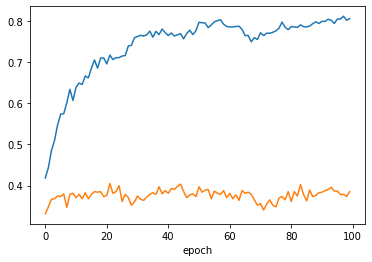

In [33]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

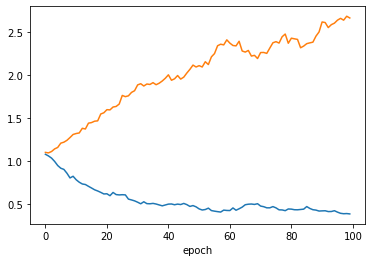

In [34]:
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.xlabel('epoch')

## 4.2 Model Evaluation

In [35]:
best_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += labels.size(0)
        correct += (predicted == label).sum().item()
    
    test_accuracy = correct / total

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.4050
